In [ ]:
#Joshua Pan
#Compare distributions of cyclist numbers for different precip intensities and wind directions
#Visualize cyclist numbers across time
#Compute correlation matrices
#DIS Apr 2022

import pandas as pd
import numpy as np
import os
import datetime as dt
from google.colab import drive
import matplotlib.pyplot as plt

#path in Joshua's drive
drive.mount('/content/drive/')
%ls
%cd /content/drive/MyDrive/DIS\ Big\ Data/Final\ Proj\ Code

Mounted at /content/drive/
drive/  sample_data/
/content/drive/MyDrive/DIS Big Data/Final Proj Code


In [ ]:
df = pd.read_csv('./concatDFs/mar_transformed.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#remove weekends and/or certain years before saving a csv for regression train/test data
#df = df[df.date.dt.dayofweek < 5] #remove weekends
#df = df[(df.date.dt.year > 2010) & (df.date.dt.year < 2021)]
df.to_csv(path_or_buf = './model_data/x_mdl.csv')

In [ ]:
def windquadrant(drct):
    #compass quadrant of wind direction (NE: 0, NW: 1, SW: 2, SE: 3)
    if drct <= 90 and drct > 0:
        return 0
    if drct == 0 or drct <= 360 and drct > 270:
        return 1
    if drct <= 270 and drct > 180:
        return 2
    if drct <= 180 and drct > 90:
        return 3
    return -1

Text(0.5, 0, 'Daily cyclists averaged across 5 sites')

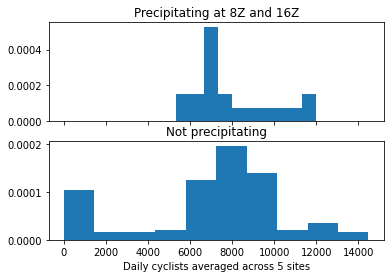

In [ ]:
#compare cyclist count distributions by precip category
selpcp = df[(df['amint'] > 0) | (df['pmint'] > 0)]['meancycle']
selnopcp = df[(df['amint'] == 0) & (df['pmint'] == 0)]['meancycle']

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(selpcp, bins=10, density=True)
ax[0].set_title('Precipitating at 8Z and 16Z')
ax[1].hist(selnopcp, bins=10, density=True)
ax[1].set_title('Not precipitating')
plt.xlabel('Daily cyclists averaged across 5 sites')

In [ ]:
#compute and save correlation matrices
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

discrete = ['amint', 'pmint', 'maxsdrct']
num_df = df.copy().drop(labels=discrete, axis=1) #numerical df
#num_df = num_df.iloc[31:309, :]
covmat = num_df.cov()
corr = num_df.corr()
corr.to_csv(path_or_buf = './concatDFs/x_corr.csv')
#corr.style.background_gradient(cmap='coolwarm').set_precision(3)

In [ ]:
#display correlation matrix
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


,mintmpf,maxtmpf,8amtmpf,4pmtmpf,maxdwpf,maxsknt,pctovc,meanrh,minalt,minvis,minfeel,maxfeel,pctpcp,pctmdt,pctsn,Hadsundvej,Hjørringvej,Hobrovej,Limfjordsbroen,Sønderbro,meancycle,maxsdrct2,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
mintmpf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
maxtmpf,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8amtmpf,0.84,0.72,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4pmtmpf,0.65,0.82,0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
maxdwpf,0.77,0.75,0.71,0.60,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
maxsknt,0.37,0.04,0.33,0.12,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pctovc,0.04,-0.19,-0.07,-0.18,0.04,-0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
meanrh,0.38,0.13,0.14,-0.01,0.63,-0.05,0.29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
minalt,-0.21,0.15,-0.12,0.08,-0.16,-0.34,0.04,-0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
minvis,-0.20,-0.13,-0.01,0.06,-0.48,0.10,-0.17,-0.70,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(0.5, 1.0, 'July')

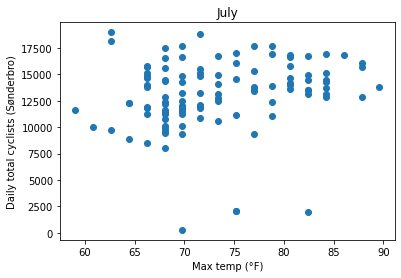

In [ ]:
plt.scatter(df['maxtmpf'], df['Sønderbro'])
plt.xlabel('Max temp (°F)')
plt.ylabel('Daily total cyclists (Sønderbro)')
plt.title('July')

Text(0.5, 1.0, 'July')

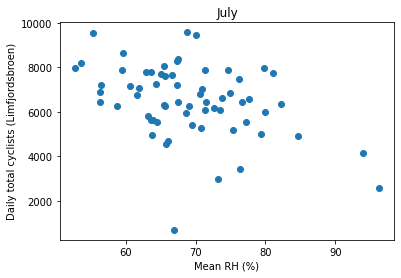

In [ ]:
plt.scatter(df['meanrh'], df['Limfjordsbroen'])
plt.xlabel('Mean RH (%)')
plt.ylabel('Daily total cyclists (Limfjordsbroen)')
plt.title('July')

Text(0.5, 1.0, 'March')

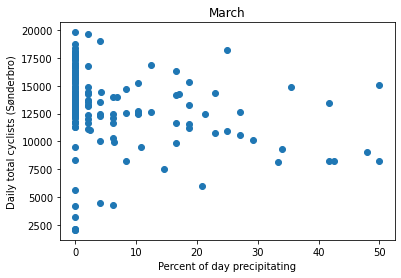

In [ ]:
plt.scatter(df['pctpcp'], df['Sønderbro'])
plt.xlabel('Percent of day precipitating')
plt.ylabel('Daily total cyclists (Sønderbro)')
plt.title('March')

Text(0.5, 1.0, 'March')

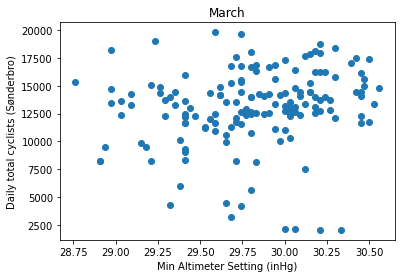

In [ ]:
plt.scatter(df['minalt'], df['Sønderbro'])
plt.xlabel('Min Altimeter Setting (inHg)')
plt.ylabel('Daily total cyclists (Sønderbro)')
plt.title('March')

Text(0.5, 1.0, 'March')

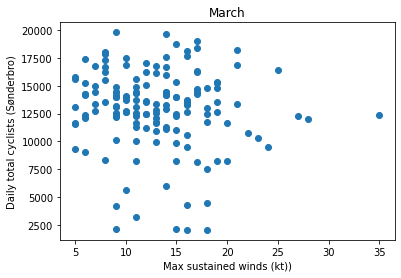

In [ ]:
plt.scatter(df['maxsknt'], df['Sønderbro'])
plt.xlabel('Max sustained winds (kt))')
plt.ylabel('Daily total cyclists (Sønderbro)')
plt.title('March')

Text(0.5, 0.85, 'March')

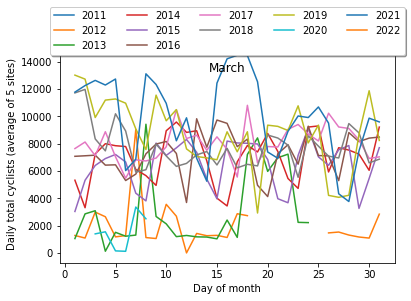

In [ ]:
#plot separate lines for each year to check for fishy cyclist numbers
#this cell only works as intended when weekends/years are not removed above
numyrs = 12
daysinmo = df.shape[0] // numyrs
splitdfs = [df[daysinmo * i : daysinmo * (i + 1)] for i in range(numyrs)]

for i in range(numyrs):
    plt.plot(range(1, daysinmo + 1), splitdfs[i]['meancycle'], label=splitdfs[i]['date'].iloc[0].year)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Day of month')
plt.ylabel('Daily total cyclists (average of 5 sites)')
plt.title('March', y=0.85)

Text(0, 0.5, 'Daily total cyclists (average of 5 sites)')

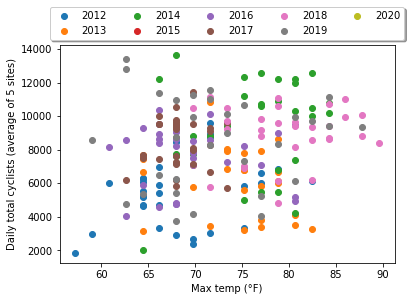

In [ ]:
#scatter cyclist numbers against temp, color-coded by year
#this cell only works as intended when weekends/years are not removed above
numyrs = 11
daysinmo = df.shape[0] // numyrs
splitdfs = [df[daysinmo * i : daysinmo * (i + 1)] for i in range(numyrs)]

for i in range(numyrs):
    plt.scatter(splitdfs[i]['maxtmpf'], splitdfs[i]['meancycle'], label=splitdfs[i]['date'].iloc[0].year)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Max temp (°F)')
plt.ylabel('Daily total cyclists (average of 5 sites)')